In [ ]:
#KeyQuestions:
#1.What kind of photos have a higher accuracy rate of guessing?
#2.The relationship between the age/gender of Gamer and the accuracy rate?
#3.Do Asians really think that white people always look older than they really are?
#Related Data: 
#Gamers: uid, points, ethnicity.
#Guess: uid, photo_id, ageG, outG.
#photos: photo_id, age, ethnicity.

In [ ]:
#Progress: 
#15/02: import and check the data.
#16/02: cleaned the data, determined the important variables.

In [ ]:
#Question:
#16/02: Should I delete all irrelevant data?

In [1]:
import pandas as pd

In [149]:
import numpy as np

In [10]:
import pandas_profiling as pp

In [150]:
import matplotlib

In [169]:
import matplotlib.pyplot as plt

In [170]:
from pandas import DataFrame

In [209]:
import seaborn as sns

In [7]:
gamers=pd.read_csv('ag_gamers.csv',encoding='ISO-8859-1')

In [8]:
gamers

uid    g    ng  points  gender        ethnicity  birth_country  \
0        1  212  2906   13523  Female  Caucasian/White         France   
1        2   25   206    1353    Male  Caucasian/White        Germany   
2        3  143  1892    9999    Male  Caucasian/White         Serbia   
3        4    0     0     210    Male  Caucasian/White         France   
4        5    3    10      91     NaN              NaN            NaN   
...    ...  ...   ...     ...     ...              ...            ...   
4432  4433    0     9      29  Female  Caucasian/White  United States   
4433  4434    3    19     125  Female  Caucasian/White    Netherlands   
4434  4435    0     0       0    Male              NaN            NaN   
4435  4436    0     0       0    Male              NaN            NaN   
4436  4437    0     0       0    Male              NaN            NaN   

      birth_year              created               access  
0         1991.0  2014-08-02 16:04:53  2019-03-22 17:40:08  
1         1973.0  2013-07-24 13:57:51  2014-10-13 17:35:05  
2         1974.0  2013-07-24 13:57:51  2016-10-26 15:49:07  
3            NaN  2013-07-24 13:57:51  2013-10-16 21:47:10  
4            NaN  2013-07-24 13:57:51  2013-10-14 10:17:39  
...          ...                  ...                  ...  
4432      2004.0  2019-03-22 02:16:37  2019-03-22 02:19:20  
4433      2005.0  2019-03-26 18:20:36  2019-03-26 18:21:22  
4434         NaN  2019-03-27 10:23:58  2019-03-27 10:23:58  
4435         NaN  2019-03-27 10:27:09  2019-03-27 10:27:09  
4436         NaN  2019-03-27 12:20:15  2019-03-27 12:20:15  

[4437 rows x 10 columns]

In [9]:
gamers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            4437 non-null   int64  
 1   g              4437 non-null   int64  
 2   ng             4437 non-null   int64  
 3   points         4437 non-null   int64  
 4   gender         4099 non-null   object 
 5   ethnicity      3917 non-null   object 
 6   birth_country  3914 non-null   object 
 7   birth_year     3910 non-null   float64
 8   created        4437 non-null   object 
 9   access         4437 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 346.8+ KB


In [11]:
pp.ProfileReport(gamers)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
gamers.drop(columns=['gender','birth_year','created','access'],axis=1)

uid    g    ng  points        ethnicity  birth_country
0        1  212  2906   13523  Caucasian/White         France
1        2   25   206    1353  Caucasian/White        Germany
2        3  143  1892    9999  Caucasian/White         Serbia
3        4    0     0     210  Caucasian/White         France
4        5    3    10      91              NaN            NaN
...    ...  ...   ...     ...              ...            ...
4432  4433    0     9      29  Caucasian/White  United States
4433  4434    3    19     125  Caucasian/White    Netherlands
4434  4435    0     0       0              NaN            NaN
4435  4436    0     0       0              NaN            NaN
4436  4437    0     0       0              NaN            NaN

[4437 rows x 6 columns]

In [17]:
gamers=gamers.drop(columns=['gender','birth_year','created','access'],axis=1)

In [25]:
gamers.dropna()

uid    g    ng  points        ethnicity  birth_country
0        1  212  2906   13523  Caucasian/White         France
1        2   25   206    1353  Caucasian/White        Germany
2        3  143  1892    9999  Caucasian/White         Serbia
3        4    0     0     210  Caucasian/White         France
5        6    3    49     357  Caucasian/White         France
...    ...  ...   ...     ...              ...            ...
4429  4430    1     7      44  Caucasian/White  United States
4430  4431    9   114     604  Caucasian/White  United States
4431  4432    0     6      35            Asian          China
4432  4433    0     9      29  Caucasian/White  United States
4433  4434    3    19     125  Caucasian/White    Netherlands

[3904 rows x 6 columns]

In [34]:
gamers=gamers.dropna()

In [35]:
gamers.dtypes

uid               int64
g                 int64
ng                int64
points            int64
ethnicity        object
birth_country    object
dtype: object

In [36]:
gamers.to_csv('gamers_clean.csv',encoding ='utf-8')

In [37]:
guess=pd.read_csv('ag_guess.csv')

In [38]:
guess

uid  photo_id  guess_id  ageG  outG               access
0          6       243        10    28     2  2012-05-30 03:10:00
1          5       243        12    26     0  2012-05-30 03:10:00
2          3       243        37    25    -1  2012-05-30 03:40:00
3          8       243        50    23    -3  2012-05-30 04:07:00
4          9       243        67    28     2  2012-05-30 04:23:00
...      ...       ...       ...   ...   ...                  ...
220382  4432    255075    254911    24    -4  2019-03-22 15:35:14
220383  3422    255075    254990    26    -2  2019-03-23 16:43:57
220384  4376    255075    255066    22    -6  2019-03-25 05:58:55
220385  4427    255075    255085    21    -7  2019-03-25 22:30:51
220386  4434    255075    255112    19    -9  2019-03-26 18:23:35

[220387 rows x 6 columns]

In [40]:
guess=guess.drop(columns=['access'],axis=1)

In [41]:
guess

uid  photo_id  guess_id  ageG  outG
0          6       243        10    28     2
1          5       243        12    26     0
2          3       243        37    25    -1
3          8       243        50    23    -3
4          9       243        67    28     2
...      ...       ...       ...   ...   ...
220382  4432    255075    254911    24    -4
220383  3422    255075    254990    26    -2
220384  4376    255075    255066    22    -6
220385  4427    255075    255085    21    -7
220386  4434    255075    255112    19    -9

[220387 rows x 5 columns]

In [42]:
guess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220387 entries, 0 to 220386
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   uid       220387 non-null  int64
 1   photo_id  220387 non-null  int64
 2   guess_id  220387 non-null  int64
 3   ageG      220387 non-null  int64
 4   outG      220387 non-null  int64
dtypes: int64(5)
memory usage: 8.4 MB


In [43]:
pp.ProfileReport(guess)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
guess.dtypes

uid         int64
photo_id    int64
guess_id    int64
ageG        int64
outG        int64
dtype: object

In [48]:
guess.to_csv('guess_clean.csv',encoding ='utf-8')

In [45]:
photos=pd.read_csv('ag_photos.csv',encoding='ISO-8859-1')

In [46]:
photos

uid  photo_id  age relation gender        ethnicity   birth_country  \
0        4       243   26     User   Male  Caucasian/White          France   
1        4       449   49     User   Male  Caucasian/White          France   
2        4       556   25     User   Male  Caucasian/White          France   
3        4       699   48     User   Male  Caucasian/White          France   
4        4       820   35     User   Male  Caucasian/White          France   
...    ...       ...  ...      ...    ...              ...             ...   
4717  4428    255125   18     User   Male  Caucasian/White  Czech Republic   
4718  4428    255126   18     User   Male  Caucasian/White  Czech Republic   
4719  4428    255128   18     User   Male  Caucasian/White  Czech Republic   
4720  4427    255130   17     User   Male  Caucasian/White        Portugal   
4721  4429    255131   30     User   Male  Caucasian/White   United States   

      birth_year  death_age              created  
0            NaN        NaN  2012-05-24 00:00:00  
1            NaN        NaN  2012-05-24 00:00:00  
2            NaN        NaN  2012-05-24 00:00:00  
3            NaN        NaN  2012-05-24 00:00:00  
4            NaN        NaN  2012-05-24 00:00:00  
...          ...        ...                  ...  
4717      2000.0        NaN  2019-03-18 01:16:53  
4718      2000.0        NaN  2019-03-18 01:17:16  
4719      2000.0        NaN  2019-03-18 01:23:22  
4720      2001.0        NaN  2019-03-18 16:00:44  
4721      1987.0        NaN  2019-03-18 18:34:23  

[4722 rows x 10 columns]

In [52]:
photos=photos.drop(columns=['relation','birth_year','death_age','created'],axis=1)

In [53]:
photos

uid  photo_id  age gender        ethnicity   birth_country
0        4       243   26   Male  Caucasian/White          France
1        4       449   49   Male  Caucasian/White          France
2        4       556   25   Male  Caucasian/White          France
3        4       699   48   Male  Caucasian/White          France
4        4       820   35   Male  Caucasian/White          France
...    ...       ...  ...    ...              ...             ...
4717  4428    255125   18   Male  Caucasian/White  Czech Republic
4718  4428    255126   18   Male  Caucasian/White  Czech Republic
4719  4428    255128   18   Male  Caucasian/White  Czech Republic
4720  4427    255130   17   Male  Caucasian/White        Portugal
4721  4429    255131   30   Male  Caucasian/White   United States

[4722 rows x 6 columns]

In [56]:
photos.isnull().sum().sort_values(ascending=False)

birth_country    24
ethnicity        17
gender            0
age               0
photo_id          0
uid               0
dtype: int64

In [74]:
photos.isnull().any()

uid              False
photo_id         False
age              False
gender           False
ethnicity         True
birth_country     True
dtype: bool

In [77]:
photos=photos.dropna(axis=0, subset=['ethnicity'] )

In [ ]:
# subset =['A'], delete all rows with empty values in column A

In [78]:
photos.isnull().any()

uid              False
photo_id         False
age              False
gender           False
ethnicity        False
birth_country     True
dtype: bool

In [86]:
photos=photos.fillna('Other',axis=0)

In [87]:
photos.isnull().any()

uid              False
photo_id         False
age              False
gender           False
ethnicity        False
birth_country    False
dtype: bool

In [88]:
photos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4705 entries, 0 to 4721
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uid            4705 non-null   int64 
 1   photo_id       4705 non-null   int64 
 2   age            4705 non-null   int64 
 3   gender         4705 non-null   object
 4   ethnicity      4705 non-null   object
 5   birth_country  4705 non-null   object
dtypes: int64(3), object(3)
memory usage: 257.3+ KB


In [89]:
pp.ProfileReport(photos)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [90]:
photos.to_csv('photos_clean.csv',encoding ='utf-8')

In [92]:
gamers_clean=pd.read_csv('gamers_clean.csv')

In [98]:
guess_clean=pd.read_csv('guess_clean.csv')

In [99]:
photos_clean=pd.read_csv('photos_clean.csv')

In [129]:
import sqlite3

In [130]:
conn = sqlite3.connect('ageg.db')

In [ ]:
#I used SQLite to merged data and further cleaned data, please check the notebooks of "ageproject _Lisha_1702.db"

In [143]:
ageproject = pd.read_csv('ageguessproject.csv')

In [153]:
ageproject

uid gamer_ethnicity gamer_birthcountry  photo_id powner_gender  \
0         76           Asian      United States       243          Male   
1        122           Asian              India       243          Male   
2        136           Asian              India       243          Male   
3        184           Asian              India       243          Male   
4        540           Asian      United States       243          Male   
...      ...             ...                ...       ...           ...   
206376  4422           Other            Estonia    254766          Male   
206377  4422           Other            Estonia    254804        Female   
206378  4422           Other            Estonia    254854        Female   
206379  4422           Other            Estonia    254870        Female   
206380  4422           Other            Estonia    254890        Female   

       powner_ethnicity powner_birthcountry  powner_age  ageG  outG  
0       Caucasian/White              France          26    29     3  
1       Caucasian/White              France          26    25    -1  
2       Caucasian/White              France          26    28     2  
3       Caucasian/White              France          26    26     0  
4       Caucasian/White              France          26    31     5  
...                 ...                 ...         ...   ...   ...  
206376  Caucasian/White         Netherlands          44    26   -18  
206377  Caucasian/White       United States          28    26    -2  
206378  Caucasian/White      United Kingdom          56    54    -2  
206379  Caucasian/White              Canada          34    36     2  
206380  Caucasian/White       United States          31    15   -16  

[206381 rows x 10 columns]

In [154]:
pp.ProfileReport(ageproject)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [162]:
gamers_num = ageproject["uid"].nunique()

In [163]:
print(gamers_num)

3232


In [197]:
asian_gamers = ageproject[(ageproject['gamer_ethnicity'] == 'Asian') ]

In [198]:
asian_gamers.head(20)

uid gamer_ethnicity gamer_birthcountry  photo_id powner_gender  \
0     76           Asian      United States       243          Male   
1    122           Asian              India       243          Male   
2    136           Asian              India       243          Male   
3    184           Asian              India       243          Male   
4    540           Asian      United States       243          Male   
5    547           Asian              India       243          Male   
6    572           Asian          Indonesia       243          Male   
7    955           Asian        South Korea       243          Male   
8    992           Asian          Indonesia       243          Male   
9   1580           Asian              India       243          Male   
10  1584           Asian        Philippines       243          Male   
11  1631           Asian        Philippines       243          Male   
12  1776           Asian      United States       243          Male   
13   270           Asian              Japan       449          Male   
14   547           Asian              India       449          Male   
15   711           Asian              China       449          Male   
16    76           Asian      United States       556          Male   
17   122           Asian              India       556          Male   
18   136           Asian              India       556          Male   
19   184           Asian              India       556          Male   

   powner_ethnicity powner_birthcountry  powner_age  ageG  outG  
0   Caucasian/White              France          26    29     3  
1   Caucasian/White              France          26    25    -1  
2   Caucasian/White              France          26    28     2  
3   Caucasian/White              France          26    26     0  
4   Caucasian/White              France          26    31     5  
5   Caucasian/White              France          26    22    -4  
6   Caucasian/White              France          26    30     4  
7   Caucasian/White              France          26    26     0  
8   Caucasian/White              France          26    28     2  
9   Caucasian/White              France          26    19    -7  
10  Caucasian/White              France          26    26     0  
11  Caucasian/White              France          26    23    -3  
12  Caucasian/White              France          26    28     2  
13  Caucasian/White              France          49    38   -11  
14  Caucasian/White              France          49    49     0  
15  Caucasian/White              France          49    40    -9  
16  Caucasian/White              France          25    27     2  
17  Caucasian/White              France          25    37    12  
18  Caucasian/White              France          25    38    13  
19  Caucasian/White              France          25    28     3

In [199]:
asian_gamers.tail(20)

uid gamer_ethnicity gamer_birthcountry  photo_id powner_gender  \
19062  4426           Asian           Thailand    254838        Female   
19063  4426           Asian           Thailand    254854        Female   
19064  4426           Asian           Thailand    254870        Female   
19065  4426           Asian           Thailand    254890        Female   
19066  4426           Asian           Thailand    254910          Male   
19067  4426           Asian           Thailand    254934          Male   
19068  4376           Asian           Thailand    254934          Male   
19069  4426           Asian           Thailand    254952          Male   
19070  4426           Asian           Thailand    254970        Female   
19071  4426           Asian           Thailand    254987          Male   
19072  4376           Asian           Thailand    254987          Male   
19073  4426           Asian           Thailand    255004          Male   
19074  4376           Asian           Thailand    255004          Male   
19075  4193           Asian               Iran    255004          Male   
19076  4432           Asian              China    255030        Female   
19077  4376           Asian           Thailand    255030        Female   
19078  4432           Asian              China    255063        Female   
19079  4376           Asian           Thailand    255063        Female   
19080  4432           Asian              China    255075        Female   
19081  4376           Asian           Thailand    255075        Female   

      powner_ethnicity powner_birthcountry  powner_age  ageG  outG  
19062  Caucasian/White      United Kingdom          55    32   -23  
19063  Caucasian/White      United Kingdom          56    48    -8  
19064  Caucasian/White              Canada          34    24   -10  
19065  Caucasian/White       United States          31    26    -5  
19066  Caucasian/White       United States          29    18   -11  
19067  Caucasian/White      United Kingdom          39    40     1  
19068  Caucasian/White      United Kingdom          39    38    -1  
19069         Hispanic       United States          35    36     1  
19070  Caucasian/White       United States          16    33    17  
19071  Caucasian/White      United Kingdom          39    42     3  
19072  Caucasian/White      United Kingdom          39    36    -3  
19073  Caucasian/White       United States          46    42    -4  
19074  Caucasian/White       United States          46    52     6  
19075  Caucasian/White       United States          46    37    -9  
19076  Caucasian/White             Estonia          37    26   -11  
19077  Caucasian/White             Estonia          37    30    -7  
19078  Caucasian/White             Estonia          33    39     6  
19079  Caucasian/White             Estonia          33    37     4  
19080  Caucasian/White       Faroe Islands          28    24    -4  
19081  Caucasian/White       Faroe Islands          28    22    -6

In [200]:
asian_gamers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19082 entries, 0 to 19081
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   uid                  19082 non-null  int64 
 1   gamer_ethnicity      19082 non-null  object
 2   gamer_birthcountry   19082 non-null  object
 3   photo_id             19082 non-null  int64 
 4   powner_gender        19082 non-null  object
 5   powner_ethnicity     19082 non-null  object
 6   powner_birthcountry  19082 non-null  object
 7   powner_age           19082 non-null  int64 
 8   ageG                 19082 non-null  int64 
 9   outG                 19082 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.6+ MB


In [201]:
asian_gamers_asianp = asian_gamers[(asian_gamers['powner_ethnicity'] == 'Asian') ]

In [202]:
asian_gamers_asianp.head()

uid gamer_ethnicity gamer_birthcountry  photo_id powner_gender  \
467   339           Asian      United States     14738        Female   
468   465           Asian        Philippines     14738        Female   
469   547           Asian              India     14738        Female   
470  1391           Asian           Malaysia     14738        Female   
471  2657           Asian             Belize     14738        Female   

    powner_ethnicity powner_birthcountry  powner_age  ageG  outG  
467            Asian       United States          37    29    -8  
468            Asian       United States          37    34    -3  
469            Asian       United States          37    21   -16  
470            Asian       United States          37    32    -5  
471            Asian       United States          37    36    -1

In [203]:
asian_gamers_non_asianp = asian_gamers[(asian_gamers['powner_ethnicity'] != 'Asian') ]

In [204]:
asian_gamers_non_asianp.head()

uid gamer_ethnicity gamer_birthcountry  photo_id powner_gender  \
0   76           Asian      United States       243          Male   
1  122           Asian              India       243          Male   
2  136           Asian              India       243          Male   
3  184           Asian              India       243          Male   
4  540           Asian      United States       243          Male   

  powner_ethnicity powner_birthcountry  powner_age  ageG  outG  
0  Caucasian/White              France          26    29     3  
1  Caucasian/White              France          26    25    -1  
2  Caucasian/White              France          26    28     2  
3  Caucasian/White              France          26    26     0  
4  Caucasian/White              France          26    31     5

In [205]:
asian_gamers_whitep = asian_gamers[(asian_gamers['powner_ethnicity'] == 'Caucasian/White') ]

In [206]:
asian_gamers_whitep.head()

uid gamer_ethnicity gamer_birthcountry  photo_id powner_gender  \
0   76           Asian      United States       243          Male   
1  122           Asian              India       243          Male   
2  136           Asian              India       243          Male   
3  184           Asian              India       243          Male   
4  540           Asian      United States       243          Male   

  powner_ethnicity powner_birthcountry  powner_age  ageG  outG  
0  Caucasian/White              France          26    29     3  
1  Caucasian/White              France          26    25    -1  
2  Caucasian/White              France          26    28     2  
3  Caucasian/White              France          26    26     0  
4  Caucasian/White              France          26    31     5

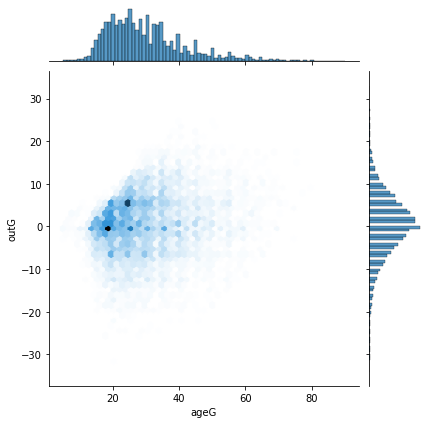

In [210]:
x = asian_gamers['ageG']
y = asian_gamers['outG']

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

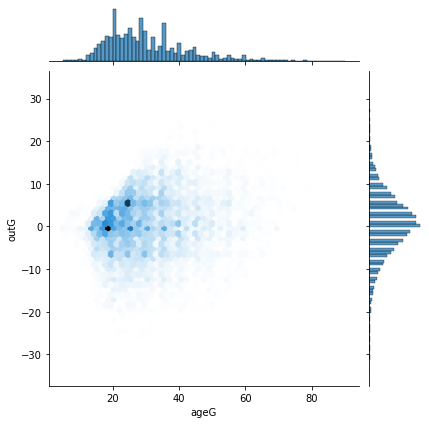

In [211]:
x = asian_gamers_non_asianp['ageG']
y = asian_gamers_non_asianp['outG']

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

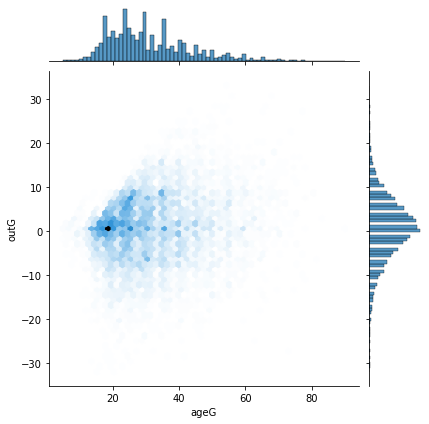

In [212]:
x = asian_gamers_whitep['ageG']
y = asian_gamers_whitep['outG']

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

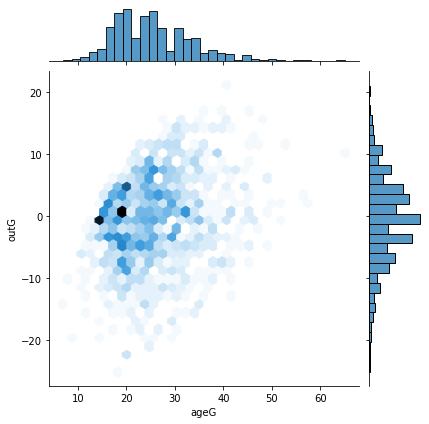

In [217]:
x = asian_gamers_asianp['ageG']
y = asian_gamers_asianp['outG']

sns.jointplot(x=x, y=y, kind='hex')
plt.show()

In [215]:
asian_gamers_asianp = asian_gamers[(asian_gamers['powner_ethnicity'] == 'Asian') ]

In [216]:
asian_gamers.describe()

uid       photo_id    powner_age          ageG          outG
count  19082.000000   19082.000000  19082.000000  19082.000000  19082.000000
mean    3204.751284  133955.046117     29.174405     29.510429      0.338801
std     1021.682457   63746.680837     12.238189     11.377902      7.037810
min       76.000000     243.000000      5.000000      5.000000    -34.000000
25%     3063.000000   85708.000000     19.000000     21.000000     -4.000000
50%     3231.000000  136646.000000     27.000000     27.000000      1.000000
75%     4015.000000  184034.250000     36.000000     35.000000      5.000000
max     4432.000000  255075.000000    100.000000     90.000000     33.000000

In [213]:
asian_gamers_non_asianp.describe()

uid       photo_id    powner_age          ageG          outG
count  17676.000000   17676.000000  17676.000000  17676.000000  17676.000000
mean    3200.510240  134243.845157     29.428660     29.841027      0.415365
std     1030.640972   64275.717049     12.431472     11.557414      7.052217
min       76.000000     243.000000      5.000000      5.000000    -34.000000
25%     3063.000000   84623.000000     20.000000     21.000000     -4.000000
50%     3231.000000  137005.000000     27.000000     28.000000      1.000000
75%     4015.000000  184637.000000     37.000000     36.000000      5.000000
max     4432.000000  255075.000000    100.000000     90.000000     33.000000

In [214]:
asian_gamers_whitep.describe()

uid       photo_id   powner_age          ageG          outG
count  15111.000000   15111.000000  15111.00000  15111.000000  15111.000000
mean    3174.424327  132598.370128     30.01939     30.466680      0.448547
std     1057.758542   65788.703503     12.75823     11.881594      7.081242
min       76.000000     243.000000      5.00000      5.000000    -32.000000
25%     2984.000000   80844.500000     20.00000     22.000000     -4.000000
50%     3231.000000  136083.000000     28.00000     28.000000      1.000000
75%     4015.000000  185136.000000     38.00000     37.000000      5.000000
max     4432.000000  255075.000000    100.00000     90.000000     33.000000

In [218]:
asian_gamers_asianp.describe()

uid       photo_id   powner_age         ageG         outG
count  1406.000000    1406.000000  1406.000000  1406.000000  1406.000000
mean   3258.068990  130324.312233    25.977952    25.354196    -0.623755
std     900.118107   56570.854006     8.880156     7.687195     6.783168
min     136.000000   14738.000000    11.000000     7.000000   -25.000000
25%    3077.000000   90486.000000    19.000000    20.000000    -5.000000
50%    3231.000000  131833.000000    25.000000    24.000000     0.000000
75%    3993.000000  179034.000000    32.000000    30.000000     4.000000
max    4426.000000  254371.000000    55.000000    65.000000    21.000000

In [311]:
s = pd.Series(np.array([0.3388, 0.4153, 0.4485, -0.6237]), index=["asians_all", "asians_non_asian", "asians_white", "asians_asian"])

In [312]:
s

asians_all          0.3388
asians_non_asian    0.4153
asians_white        0.4485
asians_asian       -0.6237
dtype: float64

In [313]:
s.to_csv('asians_guess.csv',encoding ='utf-8')

In [314]:
asians_guess= pd.read_csv('asians_guess.csv')

In [315]:
asians_guess.columns = ['a_guess','a_outG_mean']

In [316]:
asians_guess.columns 

Index(['a_guess', 'a_outG_mean'], dtype='object')

In [317]:
asians_guess

a_guess  a_outG_mean
0        asians_all       0.3388
1  asians_non_asian       0.4153
2      asians_white       0.4485
3      asians_asian      -0.6237

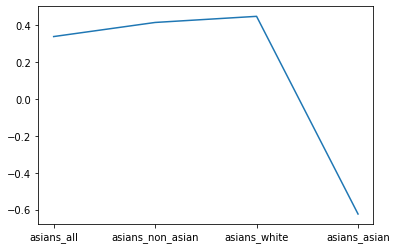

In [322]:
values = (asians_guess.a_outG_mean)
x = asians_guess.a_guess
plt.plot(x, values)

In [ ]:
#Until here, I verified my question：Do Asians really think that white people always look older than they really are?
#The result is "Yes".

In [ ]:
#I would like to do some more rigorous statistical tests, but I don't have the time.

In [323]:
exact_age = asian_gamers[ (asian_gamers['outG'] <= 2) & (asian_gamers['outG'] >= - 2) ]

In [324]:
exact_age

uid gamer_ethnicity gamer_birthcountry  photo_id powner_gender  \
1       122           Asian              India       243          Male   
2       136           Asian              India       243          Male   
3       184           Asian              India       243          Male   
7       955           Asian        South Korea       243          Male   
8       992           Asian          Indonesia       243          Male   
...     ...             ...                ...       ...           ...   
19055  4426           Asian           Thailand    254745          Male   
19057  4376           Asian           Thailand    254804        Female   
19067  4426           Asian           Thailand    254934          Male   
19068  4376           Asian           Thailand    254934          Male   
19069  4426           Asian           Thailand    254952          Male   

      powner_ethnicity powner_birthcountry  powner_age  ageG  outG  
1      Caucasian/White              France          26    25    -1  
2      Caucasian/White              France          26    28     2  
3      Caucasian/White              France          26    26     0  
7      Caucasian/White              France          26    26     0  
8      Caucasian/White              France          26    28     2  
...                ...                 ...         ...   ...   ...  
19055  Caucasian/White              Norway          43    43     0  
19057  Caucasian/White       United States          28    28     0  
19067  Caucasian/White      United Kingdom          39    40     1  
19068  Caucasian/White      United Kingdom          39    38    -1  
19069         Hispanic       United States          35    36     1  

[6056 rows x 10 columns]

In [249]:
cou = pd.DataFrame()
cou ['number'] = exact_age['gamer_birthcountry'].value_counts(sort=False)
cou = cou.sort_values(by='number', ascending=False)

In [250]:
cou

number
Malaysia                1299
China                   1077
United States           1035
Indonesia                459
Denmark                  376
India                    315
Canada                   276
Thailand                 215
Philippines              210
South Korea              126
Vietnam                  104
Kazakhstan                74
Belize                    72
United Kingdom            60
Sweden                    50
Pakistan                  50
Israel                    31
Taiwan                    24
Australia                 23
Netherlands               23
Nepal                     22
Germany                   19
Syria                     19
Singapore                 16
Vatican City State        12
Madagascar                11
Ireland                   10
United Arab Emirates       8
Hong Kong                  8
Iran                       7
France                     7
Bangladesh                 7
Ukraine                    4
Sri Lanka                  2
South Africa               2
Japan                      1
Your Mom                   1
Switzerland                1

In [251]:
cou = cou.reset_index()
x = cou['index'][:10]
y = cou['number'][:10]

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Malaysia'),
 Text(1, 0, 'China'),
 Text(2, 0, 'United States'),
 Text(3, 0, 'Indonesia'),
 Text(4, 0, 'Denmark'),
 Text(5, 0, 'India'),
 Text(6, 0, 'Canada'),
 Text(7, 0, 'Thailand'),
 Text(8, 0, 'Philippines'),
 Text(9, 0, 'South Korea')]

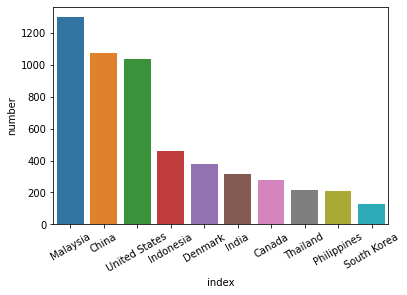

In [255]:
a = sns.barplot(x, y)
a.set_xticklabels(rotation=30, labels=x)

In [263]:
cou1 = pd.DataFrame()
cou1 ['number'] = exact_age['powner_ethnicity'].value_counts(sort=False)
cou1 = cou1.sort_values(by='number', ascending=False)

In [264]:
cou1 = cou1.reset_index()
x = cou1['index'][:10]
y = cou1['number'][:10]

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Caucasian/White'),
 Text(1, 0, 'Asian'),
 Text(2, 0, 'Hispanic'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Black')]

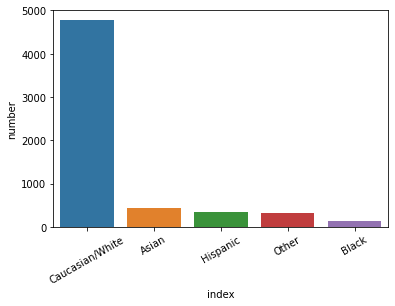

In [265]:
a = sns.barplot(x, y)
a.set_xticklabels(rotation=30, labels=x)